<a href="https://colab.research.google.com/github/scudilio/FIAP/blob/main/RN_08_Sckitlearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PREÂMBULO


In [ ]:
#importando as bliliotecas basicas
import pandas as pd #biblioteca processamento de dados
import numpy as np #biblioteca para manipulacao algebricas (array)

In [ ]:
#Biliblioetca de geração de gráficos
import matplotlib.pyplot as plt

In [ ]:
#Blibliotecas especificas para o aprendizado de máquina

from sklearn.preprocessing import StandardScaler #pre processamento padronizacao dos dados
from sklearn.model_selection import train_test_split # validacao
from sklearn.metrics import r2_score #avaliacao do modelo
from sklearn.metrics import mean_squared_error # colculo do erro
from sklearn.metrics import mean_absolute_error # calculo do erro real ex.: 1500 - 1000 = 500
from sklearn.linear_model import SGDRegressor #modelo de regressao linear ajuste Gradiente Descente Estocastico
from sklearn.neural_network import MLPRegressor # modelo multilayer perceptron para regressao


# CARREGAMENTO DO DATASET

In [ ]:
dataset = pd.read_csv("/content/auto-mpg.csv")

In [ ]:
dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
dataset.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


Text(0.5, 1.0, 'Relação entre peso e autonomia dos veiculos')

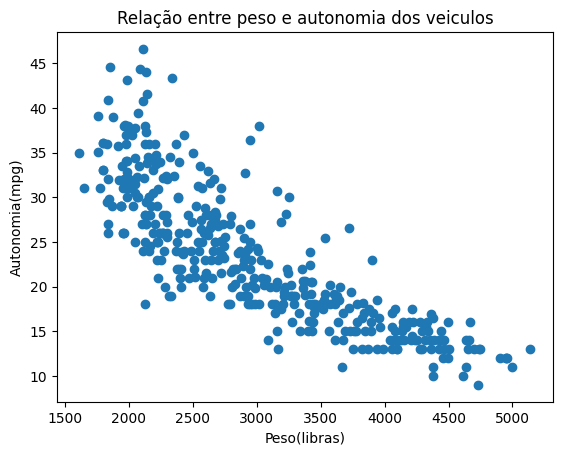

In [ ]:
plt.scatter(dataset[["weight"]], dataset[["mpg"]])
plt.xlabel("Peso(libras)")
plt.ylabel("Autonomia(mpg)")
plt.title("Relação entre peso e autonomia dos veiculos")

# Pré-processamento


In [ ]:
X = dataset[["weight"]] # [[]] dataframe
Y = dataset[["mpg"]]


In [ ]:
#Transformando de libras ->> KG
#Transformando de milhas por galão --> km por litro
X["weight"] = X["weight"] * 0.453692
Y["mpg"]= Y["mpg"] * 0.425144

<ipython-input-9-3d9a1eaa6921>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["weight"] = X["weight"] * 0.453692
<ipython-input-9-3d9a1eaa6921>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y["mpg"]= Y["mpg"] * 0.425144


In [ ]:
Y

,mpg
0,7.652592
1,6.377160
2,7.652592
3,6.802304
4,7.227448
...,...
393,11.478888
394,18.706336
395,13.604608
396,11.904032


In [ ]:
X.describe()

,weight
count,398.000000
mean,1347.657888
std,384.205338
min,731.805196
25%,1008.897585
50%,1271.925522
75%,1636.920736
max,2331.976880


In [ ]:
#Padronização
padronizacao = StandardScaler()
padronizacao.fit(X)

X_norm = padronizacao.transform(X)

In [ ]:
#Dividir  em conjunto de treinamento e teste
X_norm_train, X_norm_test, Y_train, Y_test = train_test_split(X_norm, Y, test_size= 0.3, random_state = 23)

## Ajuste da Arquitetura da Rede Neural

n# Processamento

hidden_layer_sizes: Define a arquitetura da rede neural, ou seja, o número de neurônios em cada camada oculta. No seu caso, (10, 5) significa que a rede possui duas camadas ocultas: a primeira com 10 neurônios e a segunda com 5 neurônios.

max_iter: Número máximo de iterações (ou épocas) para o algoritmo de treinamento. Aqui, 2000 indica que o algoritmo irá fazer até 2000 passagens completas sobre os dados de treinamento antes de parar.

tol: Critério de tolerância para o critério de parada do treinamento. O treinamento será interrompido quando a melhoria no erro de validação for menor que 0.0000001 entre iterações consecutivas.

learning_rate_init: Taxa de aprendizado inicial. Define o tamanho dos passos que o algoritmo dá durante o treinamento. 0.1 é o valor inicial da taxa de aprendizado para a atualização dos pesos. No caso do solver sgd (Stochastic Gradient Descent), essa taxa pode ser ajustada ao longo do tempo.

solver: Método usado para otimizar os pesos da rede. Aqui, você está usando "sgd" (Stochastic Gradient Descent). Outros métodos disponíveis incluem "adam" e "lbfgs". O SGD é um método de otimização que atualiza os pesos com base em uma amostra aleatória dos dados, enquanto os outros métodos têm abordagens diferentes para otimização.

activation: Função de ativação usada nas camadas ocultas. "logistic" é a função sigmoide, que transforma a soma ponderada das entradas em um valor entre 0 e 1. Outras funções de ativação incluem "relu" (Rectified Linear Unit) e "tanh" (tangente hiperbólica).

learning_rate: Estratégia para ajustar a taxa de aprendizado durante o treinamento. "constant" significa que a taxa de aprendizado (learning_rate_init) permanece constante durante o treinamento. Outras opções incluem "invscaling" (onde a taxa de aprendizado diminui com o tempo) e "adaptive" (onde a taxa de aprendizado é ajustada com base na melhoria da perda).

verbose: Nível de verbosidade durante o treinamento. 2 significa que informações detalhadas serão exibidas, o que pode ser útil para monitorar o progresso do treinamento e identificar possíveis problemas. Valores maiores aumentam a quantidade de detalhes fornecidos.

In [ ]:
#arquitetura da rede
rna = MLPRegressor(hidden_layer_sizes= (10,5), #camadas
                   max_iter = 2000,  #epocas
                   tol = 0.0000001,  #tolerancia de parada  (o que vir primeiro tolerancia ou epoca)
                   learning_rate_init = 0.1, #taxa de aprendizagem inicial
                   solver = "sgd",  #metodo de otimização
                   activation = "logistic", #função de ativação
                   learning_rate = "constant", #taxa de aprendizagem
                   verbose = 3,) #traz informaçoes

In [ ]:
rna.fit(X_norm_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 41.64494226
Iteration 2, loss = 7.86926436
Iteration 3, loss = 9.16852036
Iteration 4, loss = 6.00763073
Iteration 5, loss = 5.65413354
Iteration 6, loss = 5.61984451
Iteration 7, loss = 5.45851659
Iteration 8, loss = 5.18040468
Iteration 9, loss = 4.74406750
Iteration 10, loss = 4.12930103
Iteration 11, loss = 3.49048830
Iteration 12, loss = 2.87116139
Iteration 13, loss = 2.42171379
Iteration 14, loss = 2.11653256
Iteration 15, loss = 2.02022661
Iteration 16, loss = 2.02576902
Iteration 17, loss = 2.12466748
Iteration 18, loss = 2.15023729
Iteration 19, loss = 2.14176456
Iteration 20, loss = 2.12194291
Iteration 21, loss = 2.08393507
Iteration 22, loss = 2.03367187
Iteration 23, loss = 1.99975377
Iteration 24, loss = 1.97450663
Iteration 25, loss = 1.95852211
Iteration 26, loss = 1.94372198
Iteration 27, loss = 1.92693747
Iteration 28, loss = 1.90252782
Iteration 29, loss = 1.88489104
Iteration 30, loss = 1.88263389
Iteration 31, loss = 1.87615032
Iteration 32, lo

MLPRegressor(activation='logistic', hidden_layer_sizes=(10, 5),
             learning_rate_init=0.1, max_iter=2000, solver='sgd', tol=1e-07,
             verbose=3)

In [ ]:
#comparar com o modelo de Regressao linear - Não é uma RNA
reglinear = SGDRegressor(max_iter=2000,
                          tol = 0.0000001,
                         eta0= 0.1,
                         learning_rate="constant",
                         verbose=2,
                        )

In [ ]:
reglinear.fit(X_norm_train, Y_train)

-- Epoch 1
Norm: 2.84, NNZs: 1, Bias: 10.088357, T: 278, Avg. loss: 3.262483
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2.91, NNZs: 1, Bias: 10.188254, T: 556, Avg. loss: 2.012420
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 2.40, NNZs: 1, Bias: 9.425533, T: 834, Avg. loss: 1.990333
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 3.16, NNZs: 1, Bias: 9.843493, T: 1112, Avg. loss: 1.945119
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 3.03, NNZs: 1, Bias: 10.477836, T: 1390, Avg. loss: 2.014739
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 3.24, NNZs: 1, Bias: 10.267096, T: 1668, Avg. loss: 1.981109
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 2.84, NNZs: 1, Bias: 10.330437, T: 1946, Avg. loss: 1.971290
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 2.81, NNZs: 1, Bias: 9.853345, T: 2224, Avg. loss: 1.867505
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 3.39, NNZs: 1, Bias: 10.541512, T: 2502, Avg. loss: 2.038025
Total training time: 0.0

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(eta0=0.1, learning_rate='constant', max_iter=2000, tol=1e-07,
             verbose=2)

# Pos- processamento

In [ ]:
#Previssão do conjunto de teste
Y_rna_previsao = rna.predict(X_norm_test)
Y_rl_previsao = reglinear.predict(X_norm_test) #regressão

In [ ]:
#Calcular o R^2
r2_rna = r2_score(Y_test, Y_rna_previsao)
r2_rl = r2_score(Y_test,Y_rl_previsao)

# calculo erro quadratico medio
eqm_rna = mean_squared_error(Y_test, Y_rna_previsao)
eqm_rl = mean_squared_error(Y_test, Y_rl_previsao)

# calculo absoluto
eam_rna = mean_absolute_error(Y_test, Y_rna_previsao)
eam_rl = mean_absolute_error(Y_test, Y_rl_previsao)


print("R2 RNA:", r2_rna)
print("R2 RL:", r2_rl)

print("EQM (erro médio quadrático) RNA:", eqm_rna)
print("EQM RL:", eqm_rl)


print("Erro Médio Absoluto RNA:", eam_rna)
print("Erro Médio Absoluto RL:", eam_rl)

# pelas métricas concluimos que a Rede Neural teve uma melhor performance do Regressão Linear


R2 RNA: 0.6349748064989413
R2 RL: 0.6168474331864031
EQM (erro médio quadrático) RNA: 3.4865427342840616
EQM RL: 3.6596865688459945
Erro Médio Absoluto RNA: 1.4287949631629815
Erro Médio Absoluto RL: 1.5218660972208857


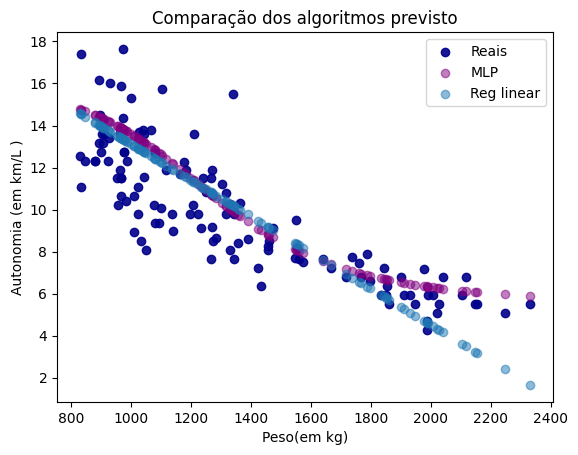

In [ ]:
X_test = padronizacao.inverse_transform(X_norm_test)
plt.scatter(X_test, Y_test, alpha = 0.9, label="Reais",color = "darkblue")
plt.scatter(X_test, Y_rna_previsao, alpha = 0.5, label="MLP", color = "purple")
plt.scatter(X_test, Y_rl_previsao, alpha = 0.5, label="Reg linear")
plt.xlabel("Peso(em kg)")
plt.ylabel("Autonomia (em km/L )")
plt.title ("Comparação dos algoritmos previsto")
plt.legend(loc=1)



In [ ]:
#Prever para um novo dado
X_futuro = np.array([[1000]])
X_futuro_norm = padronizacao.transform(X_futuro.T)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
y_rna_prev_futuro = rna.predict(X_futuro_norm)
y_reglinear_prev_futuro = reglinear.predict(X_futuro_norm)

In [ ]:
#Autonomia prevista...
print("RNA: ",y_rna_prev_futuro)
print("Reg Linear: ",y_reglinear_prev_futuro)

RNA:  [13.58982389]
Reg Linear:  [13.10360246]


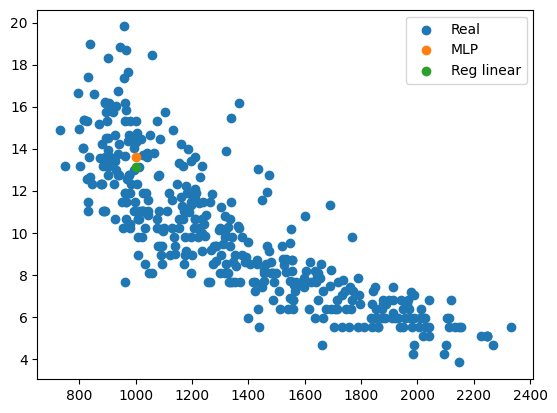

In [ ]:
plt.scatter(X, Y, label="Real")
plt.scatter(X_futuro, y_rna_prev_futuro, label="MLP")
plt.scatter(X_futuro, y_reglinear_prev_futuro, label="Reg linear")
plt.legend(loc=1)


## Exercício

1. Ajuste o modelo de RNA usando a variável Cilindros
2. Ajuste o modelo de RLA usando a biblioteca LinearRegression e compare com o ajuste do modelo de RNA